### Multivariate


Multivariate data analysis is a set of statistical models that examine patterns in multidimensional data by considering, at once, several data variables. It is an expansion of bivariate data analysis, which considers only two variables in its models.

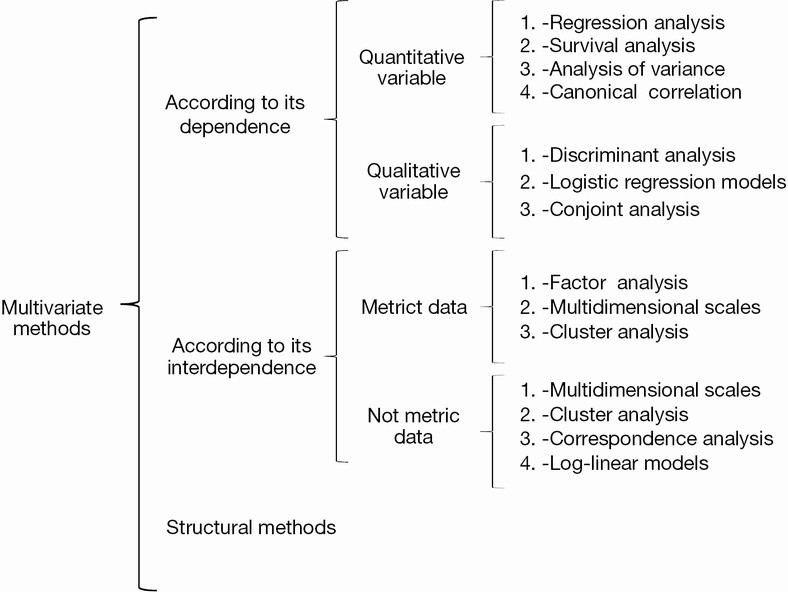


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pokemon_df = pd.read_csv('Pokemon.csv', index_col=0)

In [4]:
pokemon_df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [45]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 721
Data columns (total 12 columns):
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 75.8+ KB


In [46]:
pokemon_df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


### Dealing with Missing values

In [47]:
pokemon_df['Type 2'].fillna(value='NA', inplace=True)

In [48]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 721
Data columns (total 12 columns):
Name          800 non-null object
Type 1        800 non-null object
Type 2        800 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 75.8+ KB


# Store Legendary Pokemon Seperately

In [5]:
legendry_df = pokemon_df[pokemon_df['Legendary']==True]

## Pokemon count by Type 1

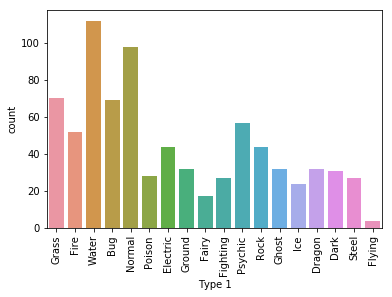

In [6]:
ax = sns.countplot(pokemon_df['Type 1'])
g= ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

## Pokemon count by Type 2

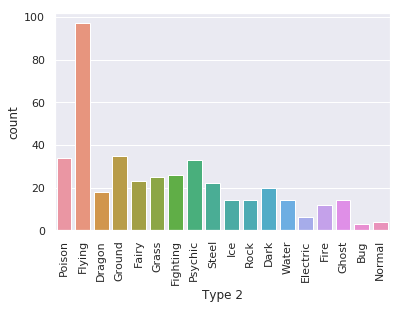

In [49]:
ax = sns.countplot(pokemon_df[pokemon_df['Type 2']!='NA']['Type 2'])
g= ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [8]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 721
Data columns (total 12 columns):
Name          800 non-null object
Type 1        800 non-null object
Type 2        800 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 95.8+ KB


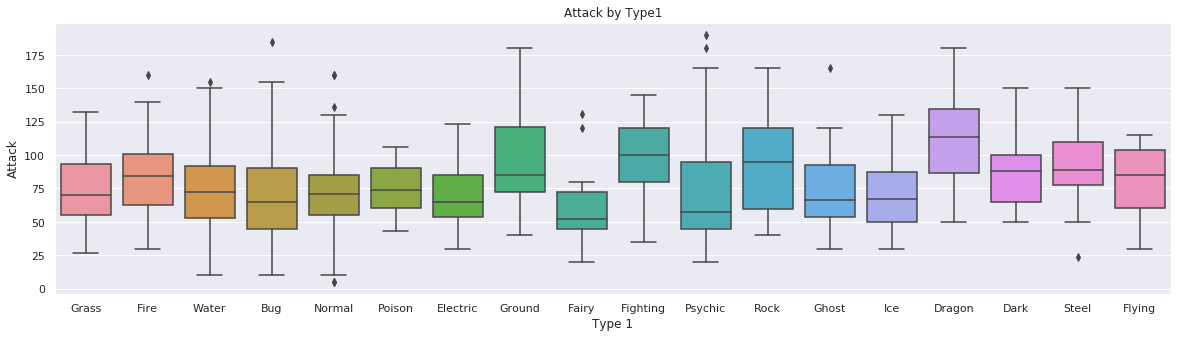

In [50]:
plt.subplots(figsize = (20,5))
plt.title('Attack by Type1')
sns.boxplot(x = "Type 1", y = "Attack",data = pokemon_df)


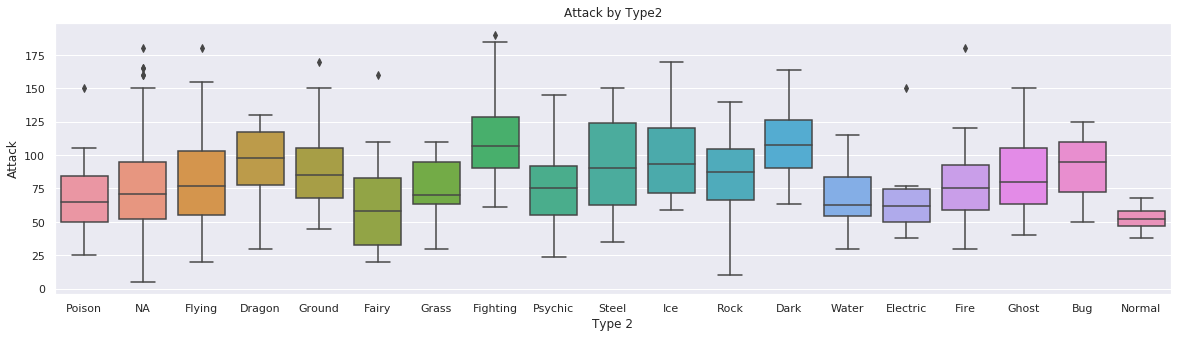

In [51]:
plt.subplots(figsize = (20,5))
plt.title('Attack by Type2')
sns.boxplot(x = "Type 2", y = "Attack",data = pokemon_df)

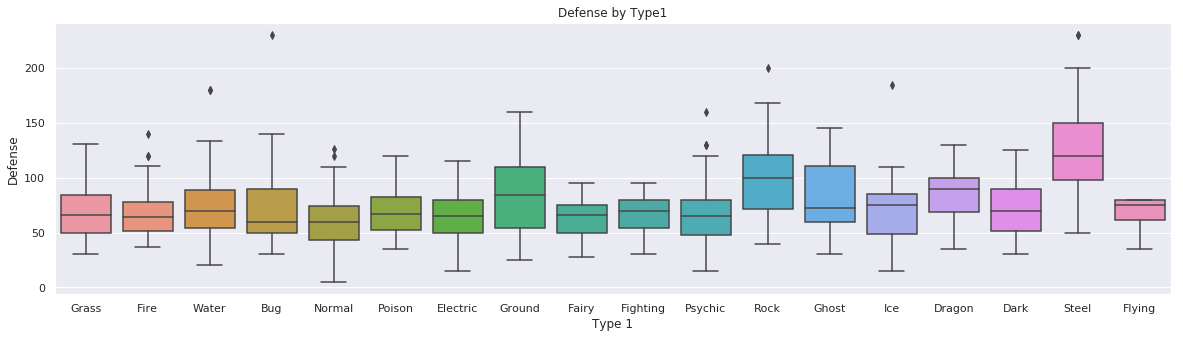

In [55]:
plt.subplots(figsize = (20,5))
plt.title('Defense by Type1')
sns.boxplot(x = "Type 1", y = "Defense",data = pokemon_df)

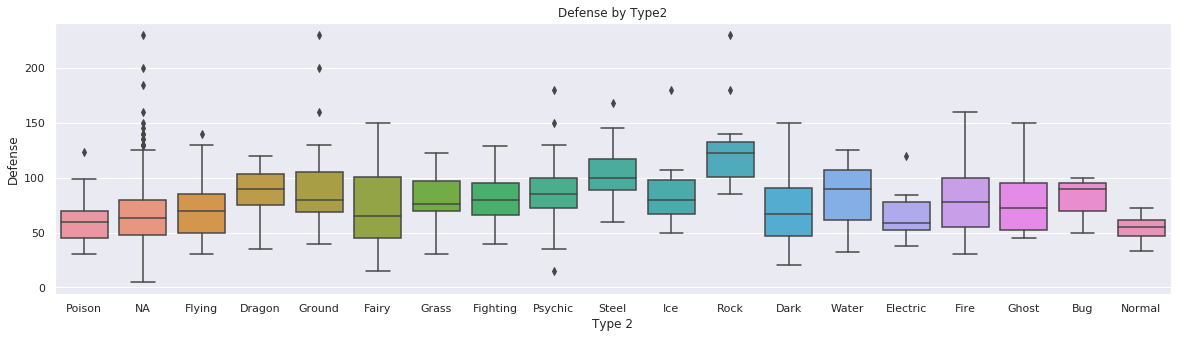

In [56]:
plt.subplots(figsize = (20,5))
plt.title('Defense by Type2')
sns.boxplot(x = "Type 2", y = "Defense",data = pokemon_df)

In [57]:
type_grouped = pokemon_df[pokemon_df['Type 2']!='NA'].groupby(['Type 1', 'Type 2']).size()
print(type_grouped)

Type 1    Type 2  
Bug       Electric     2
          Fighting     2
          Fire         2
          Flying      14
          Ghost        1
          Grass        6
          Ground       2
          Poison      12
          Rock         3
          Steel        7
          Water        1
Dark      Dragon       3
          Fighting     2
          Fire         3
          Flying       5
          Ghost        2
          Ice          2
          Psychic      2
          Steel        2
Dragon    Electric     1
          Fairy        1
          Fire         1
          Flying       6
          Ground       5
          Ice          3
          Psychic      4
Electric  Dragon       1
          Fairy        1
          Fire         1
          Flying       5
                      ..
Rock      Fighting     1
          Flying       4
          Grass        2
          Ground       6
          Ice          2
          Psychic      2
          Steel        3
          Water        6
Steel 

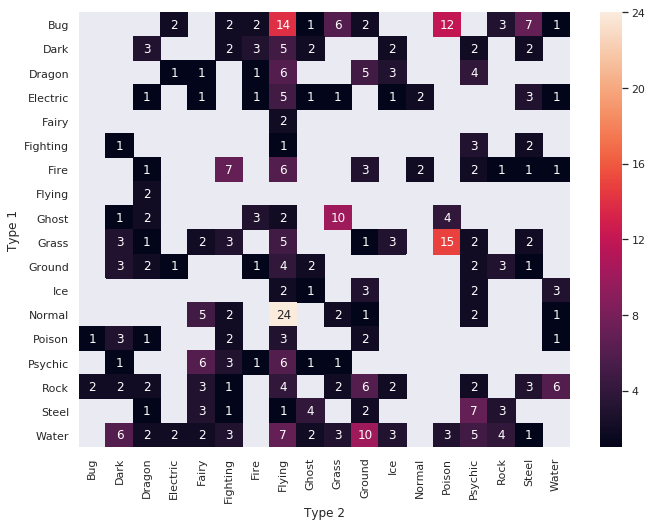

In [58]:
sns.set(rc={'figure.figsize':(11,8)})
sns.heatmap(
    type_grouped.unstack(),
    annot=True,
)
plt.xticks(rotation=90)
plt.show()

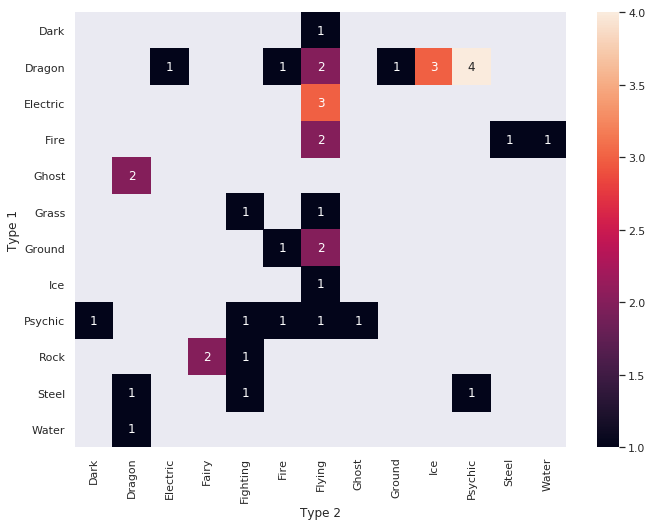

In [59]:
type_grouped = legendry_df[legendry_df['Type 2']!='NA'].groupby(['Type 1', 'Type 2']).size()
sns.set(rc={'figure.figsize':(11,8)})
sns.heatmap(
    type_grouped.unstack(),
    annot=True,
)
plt.xticks(rotation=90)
plt.show()

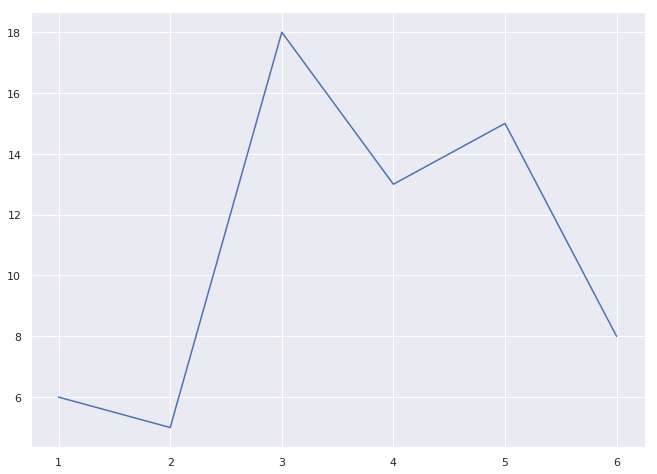

In [60]:
pokemon_gen = legendry_df.groupby('Generation')['Name'].count()
sns.lineplot(data=pokemon_gen)

In [61]:
legendry_df[legendry_df['Generation']==3]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
377,Regirock,Rock,NA,580,80,100,200,50,100,50,3,True
378,Regice,Ice,NA,580,80,50,100,100,200,50,3,True
379,Registeel,Steel,NA,580,80,75,150,75,150,50,3,True
380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
382,Kyogre,Water,NA,670,100,100,90,150,140,90,3,True
382,KyogrePrimal Kyogre,Water,NA,770,100,150,90,180,160,90,3,True


In [63]:
legendry_df[legendry_df['Generation']==5]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
494,Victini,Psychic,Fire,600,100,100,100,100,100,100,5,True
638,Cobalion,Steel,Fighting,580,91,90,129,90,72,108,5,True
639,Terrakion,Rock,Fighting,580,91,129,90,72,90,108,5,True
640,Virizion,Grass,Fighting,580,91,90,72,90,129,108,5,True
641,TornadusIncarnate Forme,Flying,NA,580,79,115,70,125,80,111,5,True
641,TornadusTherian Forme,Flying,NA,580,79,100,80,110,90,121,5,True
642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
643,Reshiram,Dragon,Fire,680,100,120,100,150,120,90,5,True


In [15]:
max_type1_per_gen = pokemon_df.groupby(['Generation','Type 1']).size()

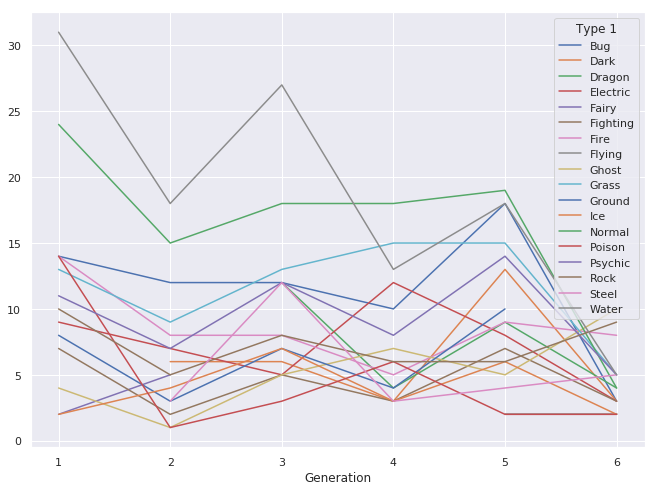

In [16]:
max_type1_per_gen.unstack().plot()

## We will use Bokeh library for Drawing interactive plots

### Code modified from : https://bokeh.pydata.org/en/latest/docs/user_guide/interaction/legends.html

In [64]:
type1_per_gen = pd.DataFrame({'count' : pokemon_df.groupby( [ "Generation", "Type 1"] ).size()}).reset_index()
print(pokemon_df.groupby( [ "Generation", "Type 1"] ).size())

Generation  Type 1  
1           Bug         14
            Dragon       3
            Electric     9
            Fairy        2
            Fighting     7
            Fire        14
            Ghost        4
            Grass       13
            Ground       8
            Ice          2
            Normal      24
            Poison      14
            Psychic     11
            Rock        10
            Water       31
2           Bug         12
            Dark         6
            Electric     7
            Fairy        5
            Fighting     2
            Fire         8
            Ghost        1
            Grass        9
            Ground       3
            Ice          4
            Normal      15
            Poison       1
            Psychic      7
            Rock         5
            Steel        3
                        ..
5           Fighting     7
            Fire         9
            Flying       2
            Ghost        5
            Grass       15
       

In [66]:
from bokeh.palettes import Spectral11
from bokeh.plotting import figure, output_file, show
from bokeh.models import Legend, LegendItem
p = figure(plot_width=800, plot_height=550, x_range=(1, 7))
p.background_fill_color = "beige"

p.title.text = 'Click on legend entries to hide the corresponding lines'
import random
legend_list = []
for type_id in type1_per_gen['Type 1'].unique():
    color = random.choice(Spectral11)
    df = pd.DataFrame(type1_per_gen[type1_per_gen['Type 1']==type_id])
    p.line(df['Generation'], df['count'], line_width=2, alpha=0.8, color=color, legend=type_id)

p.legend.location = "top_right"
p.legend.click_policy="hide"

show(p)

In [38]:
pokemon_df.groupby([ "Generation", "Type 1"])[['Total']].max()

Total
Generation Type 1         
1          Bug         600
           Dragon      600
           Electric    580
           Fairy       483
           Fighting    505
           Fire        634
           Ghost       600
           Grass       625
           Ground      485
           Ice         580
           Normal      590
           Poison      505
           Psychic     780
           Rock        615
           Water       640
2          Bug         600
           Dark        600
           Electric    610
           Fairy       450
           Fighting    455
           Fire        680
           Ghost       435
           Grass       525
           Ground      500
           Ice         450
           Normal      540
           Poison      535
           Psychic     680
           Rock        700
           Steel       610
...                    ...
5          Fighting    510
           Fire        540
           Flying      580
           Ghost       520
           Grass       580
           Ground      600
           Ice         535
           Normal      600
           Poison      474
           Psychic     600
           Rock        580
           Steel       580
           Water       580
6          Bug         411
           Dark        680
           Dragon      600
           Electric    481
           Fairy       680
           Fighting    500
           Fire        600
           Flying      535
           Ghost       494
           Grass       531
           Ice         514
           Normal      472
           Poison      494
           Psychic     680
           Rock        700
           Steel       520
           Water       530

[98 rows x 1 columns]

In [67]:
type1_total_gen = pd.DataFrame({'Total' : pokemon_df.groupby( [ "Generation", "Type 1"] )['Total'].max()}).reset_index()
print(pokemon_df.groupby( [ "Generation", "Type 1"] )['Total'].max())

Generation  Type 1  
1           Bug         600
            Dragon      600
            Electric    580
            Fairy       483
            Fighting    505
            Fire        634
            Ghost       600
            Grass       625
            Ground      485
            Ice         580
            Normal      590
            Poison      505
            Psychic     780
            Rock        615
            Water       640
2           Bug         600
            Dark        600
            Electric    610
            Fairy       450
            Fighting    455
            Fire        680
            Ghost       435
            Grass       525
            Ground      500
            Ice         450
            Normal      540
            Poison      535
            Psychic     680
            Rock        700
            Steel       610
                       ... 
5           Fighting    510
            Fire        540
            Flying      580
            Ghost       520

In [69]:
from bokeh.palettes import Spectral11
from bokeh.plotting import figure, output_file, show
from bokeh.models import Legend, LegendItem
p = figure(plot_width=800, plot_height=550, x_range=(1, 7))
p.background_fill_color = "beige"

p.title.text = 'Click on legend entries to hide the corresponding lines'
import random
legend_list = []
for type_id in type1_total_gen['Type 1'].unique():
    color = random.choice(Spectral11)
    df = pd.DataFrame(type1_total_gen[type1_total_gen['Type 1']==type_id])
    p.line(df['Generation'], df['Total'], line_width=2, alpha=0.8, color=color, legend=type_id)

p.legend.location = "top_right"
p.legend.click_policy="hide"

show(p)